This is a notebook designed to plot frequency distributions of atmospheric properties across ensemble members. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs

ModuleNotFoundError: No module named 'cartopy'

In [2]:
bcacc_metric = c3.SimpleMetric(id = "AverageMassBCacc_SimulationSample",
                            name = "AverageMassBCacc_SimulationSample",
                            description = "Calculates average of massBCacc for a given SimulationSample",
                            srcType = "SimulationSample",
                            path = "output",  # the timeseries is in the output field of SimSam
                            expression = "avg(normalized.data.mass_BC_acc)"
                           )
lon_metric = c3.SimpleMetric(id = "AverageLon_SimulationSample",
                            name = "AverageLon_SimulationSample",
                            description = "Calculates average of longitude for a given SimulationSample",
                            srcType = "SimulationSample",
                            path = "output",  # the timeseries is in the output field of SimSam
                            expression = "avg(normalized.data.longitude)"
                           )
lat_metric = c3.SimpleMetric(id = "AverageLat_SimulationSample",
                            name = "AverageLat_SimulationSample",
                            description = "Calculates average of latitude for a given SimulationSample",
                            srcType = "SimulationSample",
                            path = "output",  # the timeseries is in the output field of SimSam
                            expression = "avg(normalized.data.latitude)"
                           )
alt_metric = c3.SimpleMetric(id = "AverageAlt_SimulationSample",
                            name = "AverageAlt_SimulationSample",
                            description = "Calculates average of altitude for a given SimulationSample",
                            srcType = "SimulationSample",
                            path = "output",  # the timeseries is in the output field of SimSam
                            expression = "avg(normalized.data.altitude)"
                           )

In [3]:
ens_results=[]
for ensMem in range(0,221):
    ensID = "EnsNo_1_SimNo_"+str(ensMem)
    my_spec = c3.EvalMetricsSpec(
            ids = [ensID],
            expressions = ["AverageMassBCacc_SimulationSample"],
            start = "2017-08-18T08:00:00.000",
            end = "2017-08-18T14:00:00.000",
            interval = "MINUTE" 
            )
    evalMetricsResult = c3.SimulationSample.evalMetricsWithMetadata(
                                                                spec=my_spec,
                                                                overrideMetrics=[bcacc_metric]#
                                                                )
    
    df = c3.EvalMetricsResult.toPandas(result=evalMetricsResult)
    if ensMem==0:
        print(np.array(df['AverageMassBCacc_SimulationSample']).shape)
    ens_results.append(np.array(df['AverageMassBCacc_SimulationSample'])[0])
    if ensMem%10==0:
        print(ensID)
    

(360,)
EnsNo_1_SimNo_0
EnsNo_1_SimNo_10
EnsNo_1_SimNo_20
EnsNo_1_SimNo_30
EnsNo_1_SimNo_40
EnsNo_1_SimNo_50
EnsNo_1_SimNo_60
EnsNo_1_SimNo_70
EnsNo_1_SimNo_80
EnsNo_1_SimNo_90
EnsNo_1_SimNo_100
EnsNo_1_SimNo_110
EnsNo_1_SimNo_120
EnsNo_1_SimNo_130
EnsNo_1_SimNo_140
EnsNo_1_SimNo_150
EnsNo_1_SimNo_160
EnsNo_1_SimNo_170
EnsNo_1_SimNo_180
EnsNo_1_SimNo_190
EnsNo_1_SimNo_200
EnsNo_1_SimNo_210
EnsNo_1_SimNo_220


## Detour: alternative to the cell above ^ -- Bruno

Instead of reconstructing the SimulationSample ID, we can fetch it, avoiding having a definite range from 0 to 221 (one may not know how many samples are there):

In [4]:
ens_results=[]

samples = c3.SimulationSample.fetch().objs      # this fetches the type and grabs the objects 

for sample in samples:
    ensID = sample.id
    my_spec = c3.EvalMetricsSpec(
            ids = [ensID],
            expressions = ["AverageMassBCacc_SimulationSample"],
            start = "2017-08-18T10:00:00.000",
            end = "2017-08-18T16:00:00.000",
            interval = "MINUTE" 
            )
    evalMetricsResult = c3.SimulationSample.evalMetricsWithMetadata(
                                                                spec=my_spec,
                                                                overrideMetrics=[bcacc_metric]
                                                                )
    
    df = c3.EvalMetricsResult.toPandas(result=evalMetricsResult)
    if ensMem==0:
        print(np.array(df['AverageMassBCacc_SimulationSample']).shape)
    ens_results.append(np.array(df['AverageMassBCacc_SimulationSample']))
    if ensMem%10==0:
        print(ensID)
    ensMem+=1

EnsNo_1_SimNo_0
EnsNo_1_SimNo_107
EnsNo_1_SimNo_116
EnsNo_1_SimNo_125
EnsNo_1_SimNo_134
EnsNo_1_SimNo_143
EnsNo_1_SimNo_152
EnsNo_1_SimNo_161
EnsNo_1_SimNo_170
EnsNo_1_SimNo_18
EnsNo_1_SimNo_189
EnsNo_1_SimNo_198
EnsNo_1_SimNo_206
EnsNo_1_SimNo_215
EnsNo_1_SimNo_26
EnsNo_1_SimNo_35
EnsNo_1_SimNo_44
EnsNo_1_SimNo_53
EnsNo_1_SimNo_62
EnsNo_1_SimNo_71
EnsNo_1_SimNo_80
EnsNo_1_SimNo_9
EnsNo_1_SimNo_99


## Brack on track!

In [5]:
my_spatial_spec = c3.EvalMetricsSpec(
            ids = ["EnsNo_1_SimNo_0"],
            expressions = ["AverageAlt_SimulationSample","AverageLat_SimulationSample","AverageLon_SimulationSample"],
            start = "2017-08-18T10:00:00.000",
            end = "2017-08-18T16:00:00.000",
            interval = "MINUTE" 
            )
evalMetricsResult = c3.SimulationSample.evalMetricsWithMetadata(
                                                                spec=my_spatial_spec,
                                                                overrideMetrics=[alt_metric,lat_metric,lon_metric]#
                                                                )
    
df = c3.EvalMetricsResult.toPandas(result=evalMetricsResult)
avgAlt = np.array(df['AverageAlt_SimulationSample'])
print(np.array(df['AverageAlt_SimulationSample'])[0])

0.0


/home/c3/.conda/envs/py-gordon_2_0_0/lib/python3.6/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_coastline.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)


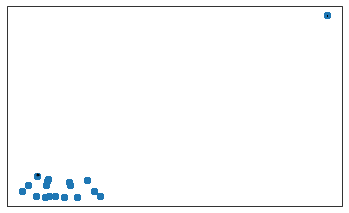

In [6]:
plt.plot(range(0,360),avgAlt)
plt.subplot(111,projection=ccrs.PlateCarree())
plt.scatter(df['AverageLon_SimulationSample'],df['AverageLat_SimulationSample'])
plt.gca().coastlines()

(221, 360)
[0.00000000e+00 6.66666667e-12 1.33333333e-11 2.00000000e-11
 2.66666667e-11 3.33333333e-11 4.00000000e-11 4.66666667e-11
 5.33333333e-11 6.00000000e-11 6.66666667e-11 7.33333333e-11
 8.00000000e-11 8.66666667e-11 9.33333333e-11 1.00000000e-10
 1.06666667e-10 1.13333333e-10 1.20000000e-10 1.26666667e-10
 1.33333333e-10 1.40000000e-10 1.46666667e-10 1.53333333e-10
 1.60000000e-10 1.66666667e-10 1.73333333e-10 1.80000000e-10
 1.86666667e-10 1.93333333e-10 2.00000000e-10]


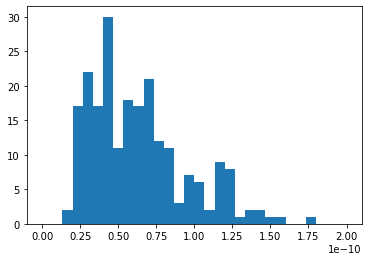

In [7]:
print(np.array(ens_results).shape)
hist_array,bins,patches=plt.hist(np.array(ens_results)[:,240],bins=30,range=(0,2e-10))

print(bins)


(30,)
[0.00000000e+00 6.66666667e-12 1.33333333e-11 2.00000000e-11
 2.66666667e-11 3.33333333e-11 4.00000000e-11 4.66666667e-11
 5.33333333e-11 6.00000000e-11 6.66666667e-11 7.33333333e-11
 8.00000000e-11 8.66666667e-11 9.33333333e-11 1.00000000e-10
 1.06666667e-10 1.13333333e-10 1.20000000e-10 1.26666667e-10
 1.33333333e-10 1.40000000e-10 1.46666667e-10 1.53333333e-10
 1.60000000e-10 1.66666667e-10 1.73333333e-10 1.80000000e-10
 1.86666667e-10 1.93333333e-10 2.00000000e-10]
221.0 (360, 30)


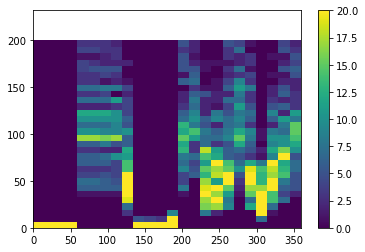

In [8]:
histograms=[]
for i in range(0,360):
    hist_array,bins,patches=plt.hist(np.array(ens_results)[:,i],30,range=(0,2e-10))
    if i==0:
        print(hist_array.shape)
    histograms.append(hist_array)
print(bins)
hists = np.array(histograms)
print(np.max(hists),hists.shape)
#totally don't understand why I have to scale this up so that the max of the y axis is 200, not 2e-10
plt.pcolormesh(range(0,361), 1e12*np.array(bins),hists.T,vmax=20)
plt.colorbar()
plt.show()

In [2]:
bcaccObs_metric = c3.SimpleMetric(id = "AverageMassBCacc_ObservationSet",
                            name = "AverageMassBCacc_ObservationSet",
                            description = "Calculates average of massBCacc for a given SimulationSample",
                            srcType = "ObservationSet",
                            path = "output",  # the timeseries is in the output field of SimSam
                            expression = "avg(normalized.data.total_BC)"
                           )
myobs_spec = c3.EvalMetricsSpec(
            ids = ["1"],
            expressions = ["AverageMassBCacc_ObservationSet"],
            start = "2017-01-01T08:00:00.000",
            end = "2017-11-01T14:00:00.000",
            interval = "MINUTE" 
            )
evalMetricsResult = c3.ObservationSet.evalMetricsWithMetadata(spec=myobs_spec,overrideMetrics=[bcaccObs_metric])
    
df = c3.EvalMetricsResult.toPandas(result=evalMetricsResult)

In [3]:
print(np.max(df['AverageMassBCacc_ObservationSet']))

7083.405750868055


<AxesSubplot:>

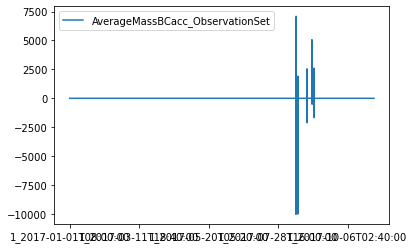

In [5]:
df.plot()